In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Generate Data

In [3]:
X_train=np.linspace(-1,1,20)

In [4]:
Y_train= np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test=np.linspace(-1,1,20)

In [6]:
Y_test=np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

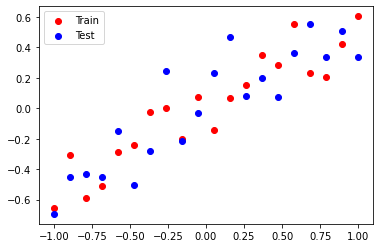

In [8]:
plt.scatter(X_train, Y_train, c='red', label='Train')
plt.scatter(X_test, Y_test, c='blue', label='Test')
plt.legend()
plt.show()

Using Dropout Layers

In [24]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, Y_train, epochs=500, 
                               validation_data = (X_test, Y_test),
                               verbose=False)

In [25]:
_, train_mse = model_2.evaluate(X_train, Y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, Y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.011445598676800728, Test: 0.039541684091091156


In [26]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 65ms/step


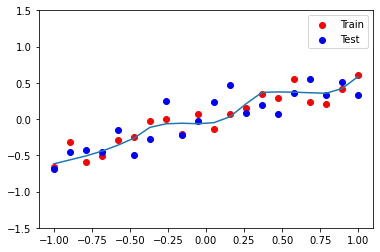

In [27]:
plt.figure()
plt.scatter(X_train, Y_train, c='red', label='Train')
plt.scatter(X_test, Y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()